In [1]:
import sys

print(f"Hey there! \n This is done with python {sys.version[:7]}.")

Hey there! 
 This is done with python 3.12.6 .


What is this about?
- The aim of this notebook is to conquer the imdb sentiment analysis challenge using python and handy libraries.
  
- Sentiment analysis involves using natural language processing (NLP) and other clever tricks to systematically identify, extract, quantify, and study emotions and subjective information in text.

- Using this dataset makes it necessary to reference the paper:
    - [Learning Word Vectors for Sentiment Analysis](https://aclanthology.org/P11-1015) (Maas et al., ACL 2011).

Not forgetting the brilliant minds behind python, libraries and the algorithms also deserve an applause. 👏🏽

Thank you to Fellowship.ai for this opportunity as well.


# IMDB Sentiment Analysis Project

Let's Begin.

But then, How?
- The aim is to write a computer program that will distinguish a positive review from a negative one.

The following is a high level overview:
- Download and observe the imdb dataset described and that received
- For better results, the reviews are preprocessed in order to remove noise, standardize text, and extract relevant features for model training.
- Split the available labelled reviews into training and testing sets to evaluate the model's performance
- Train the model using the preprocessed training data
- Evaluate the model's performance using the testing data
- Finally, use the trained model to predict sentiment on new, unseen reviews


# Common Models for IMDB Sentiment Analysis

1. Traditional Machine Learning Models (Local Methods)
   - Naive Bayes
   - Logistic Regression
   - Support Vector Machines (SVM)
   - Decision Trees
   - Random Forest

2. Deep Learning Models
   - Recurrent Neural Networks (RNN)
     - Long Short-Term Memory (LSTM)
     - Gated Recurrent Unit (GRU)
   - Convolutional Neural Networks (CNN)
   - Transformer-based Models
     - BERT
     - RoBERTa
     - XLNet

3. Ensemble Methods
   - Random Forest
   - Gradient Boosting Machines (e.g., XGBoost, LightGBM)

4. Hybrid Approaches
   - Combining traditional ML with deep learning features
   - Ensemble of different model types

5. Advanced Techniques
   - Transfer Learning
   - Multi-task Learning
   - Attention Mechanisms

Note: For Now, the focus will be using the local traditional methods (in 1) where we have better control over the model implementation and interpretation.



In [2]:
# Install and Import handy tools

# # Install commands
# %pip install pandas
# %pip install beautifulsoup4
# %pip install nltk
# %pip install pyspellchecker
# %pip install mplcursors
# %pip install matplotlib
%pip install contractions

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
from bs4 import BeautifulSoup
from spellchecker import SpellChecker
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re
import contractions
import mplcursors


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



In [3]:
import nltk

# nltk.download('stopwords')
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
def load_data(path):

    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(path)

    # Return the DataFrame
    return df

In [5]:
path = "imdp_data.csv"  # in the same root
df = load_data(path)

# Viewing the loaded Dataframe
# print(df.head)
print("Sample of 7:\n", df.sample(7), end="\n\n\n")
print("Description:", df.describe(), end="\n\n")
print(df.info(), end="\n\n")
# print("Frame: \n", df)

Sample of 7:
                                                   review sentiment
42141  Darling Lili is fantastic! Its by far one my f...  positive
36848  The Crater Lake Monster is easily one of the m...  negative
28952  I can see why Laurel and Hardy purists might b...  negative
29765  Kurosawa is a proved humanitarian. This movie ...  positive
39994  Family Guy has to be my all time favorite cart...  positive
27968  Filmed in Arizona by a mostly-foreign crew, "N...  negative
31648  I was sorely disappointed in this movie. Twice...  negative


Description:                                                    review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (tota

In [6]:
# Total number of duplicate rows: 824
duplicates = df[df.duplicated(keep=False)]
duplicate_counts = (
    duplicates.groupby(duplicates.columns.tolist()).size().reset_index(name="count")
)

print(f"Total number of duplicate rows: {len(duplicates)}")

# Print n sample of duplicates
n = 5  # You can adjust this value to show more or fewer samples
print(f"\nSample of ({n}) duplicates and count:")
print(duplicate_counts.sample(n))

# Print out a review by index
index = random.randint(0, len(df) - 1)
# index = 10  ## You can uncomment, and specify index
print(f"\n {index}th review in full:")
with pd.option_context("display.max_colwidth", None):
    print(df.iloc[index].to_string())
    print(f"\nLength of the {index}th review: {len(df.iloc[index]['review'])}")

Total number of duplicate rows: 824

Sample of (5) duplicates and count:
                                                review sentiment  count
262  So, I'm wondering while watching this film, di...  negative      2
316  This guy has no idea of cinema. Okay, it seems...  negative      2
268  THE HAND OF DEATH most definitely rates a ten ...  positive      2
170  I wish Depardieu had been able to finish his b...  negative      2
31   After all these years, of Peter O'Tool's brill...  positive      2

 7964th review in full:
review       This was among the STUPIDEST and PREACHIEST of the anti-nuke films out of the 1980s.<br /><br />The idea that a kid and a basketball star could "change the world" is pretty far-fetched, given how many "children's peace marches" and "celebrity protests" there were and ARE.<br /><br />But the idea that the Soviet Union would agree to a TOTAL nuclear disarmament, because some apparatchik kids learned of a "silent protest" in the West, is ludicrous.<br /><b

In [7]:
# Count of positive and negative reviews in the DataFrame
positive_count = df[df["sentiment"] == "positive"]["sentiment"].count()
negative_count = df[df["sentiment"] == "negative"]["sentiment"].count()

print("Positives:", positive_count)
print("Negatives:", negative_count)

Positives: 25000
Negatives: 25000


I realise the orinigal dataset was balanced out by duplicating some records. Let's remove the duplicates(quality data) and review our counts.

In [8]:
df_unique = df.drop_duplicates()
# print(df_unique.info())


# Count unique positive and negative reviews
u_positive_count = df_unique[df_unique["sentiment"] == "positive"]["sentiment"].count()
u_negative_count = df_unique[df_unique["sentiment"] == "negative"]["sentiment"].count()

print(f"Unique positives: {u_positive_count}")
print(f"Unique negatives: {u_negative_count}")
print(
    f"Total: {u_positive_count + u_negative_count}, authentic"
)  # 49582 as Kaggle indicated => authentic data

Unique positives: 24884
Unique negatives: 24698
Total: 49582, authentic


## Exploratory Data Analysis Prior Cleaning
1. Review Length Analysis (character count)
2. Word Count Analysis (number of words per review)
3. Distribution of Sentiments to check for class balance
4. Relationship between Review Length and Sentiment
5. Suggestions for Model Selection

C:\Users\HP\AppData\Local\Temp\ipykernel_2532\1232266565.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.loc[:, "review_length"] = df_unique["review"].str.len()
C:\Users\HP\AppData\Local\Temp\ipykernel_2532\1232266565.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.loc[:, "word_count"] = df_unique["review"].str.split().str.len()


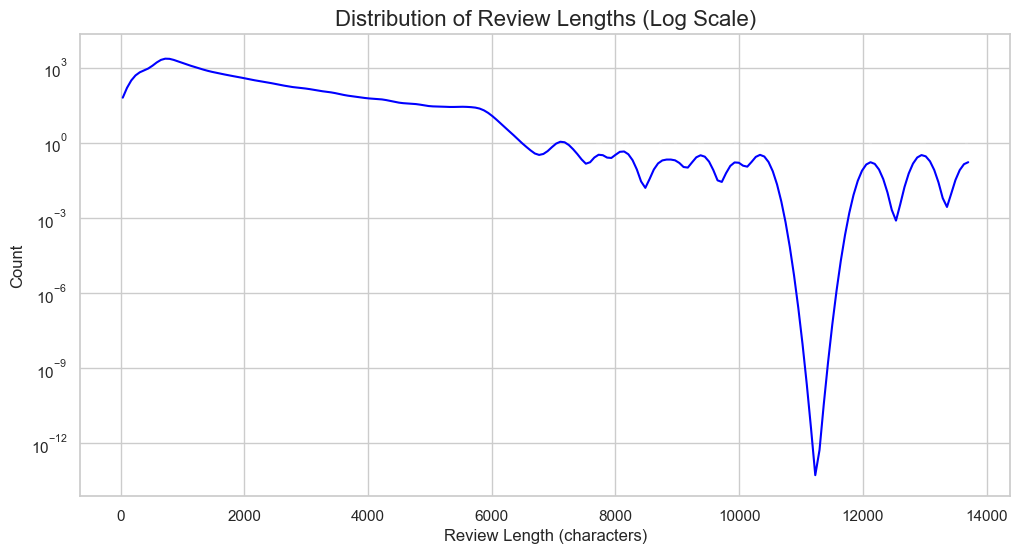

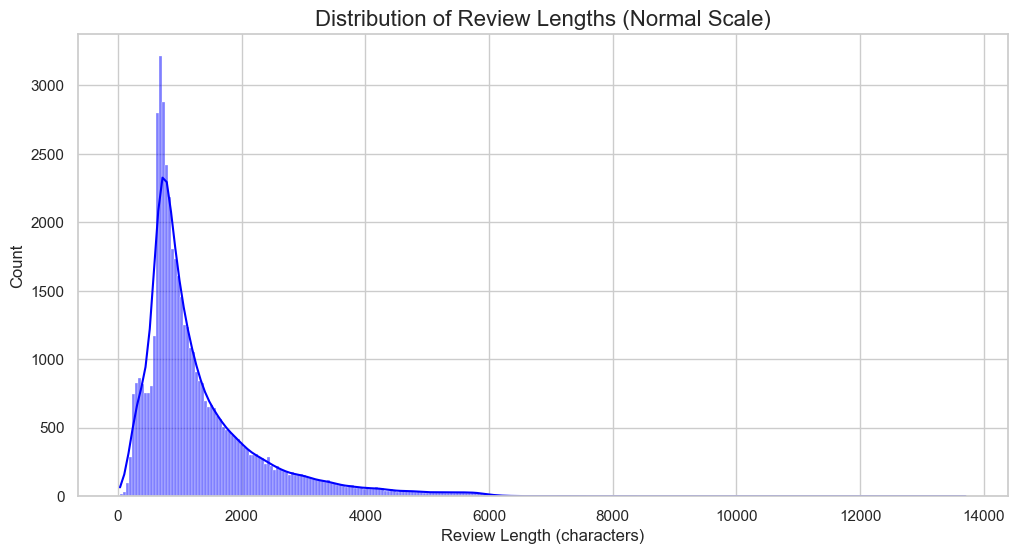

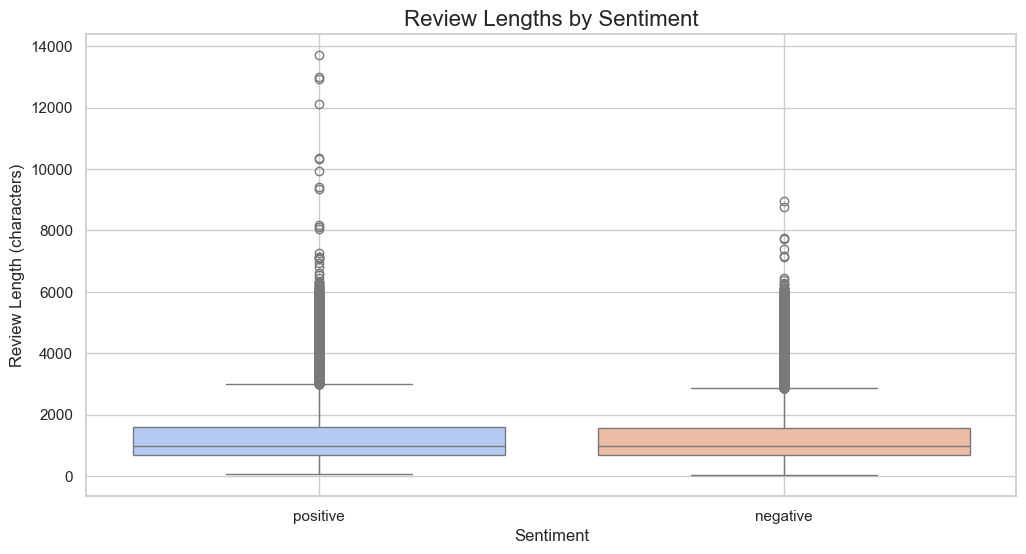

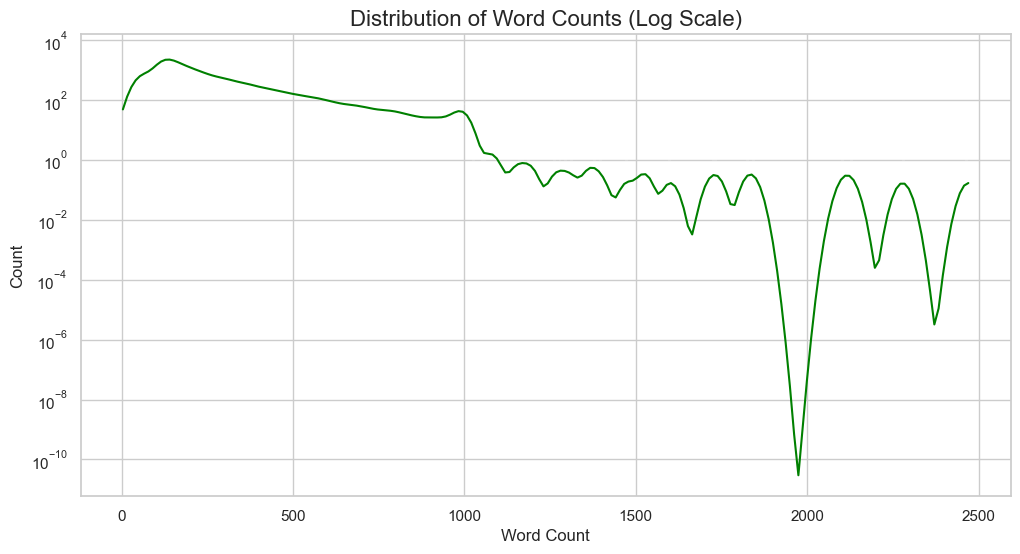

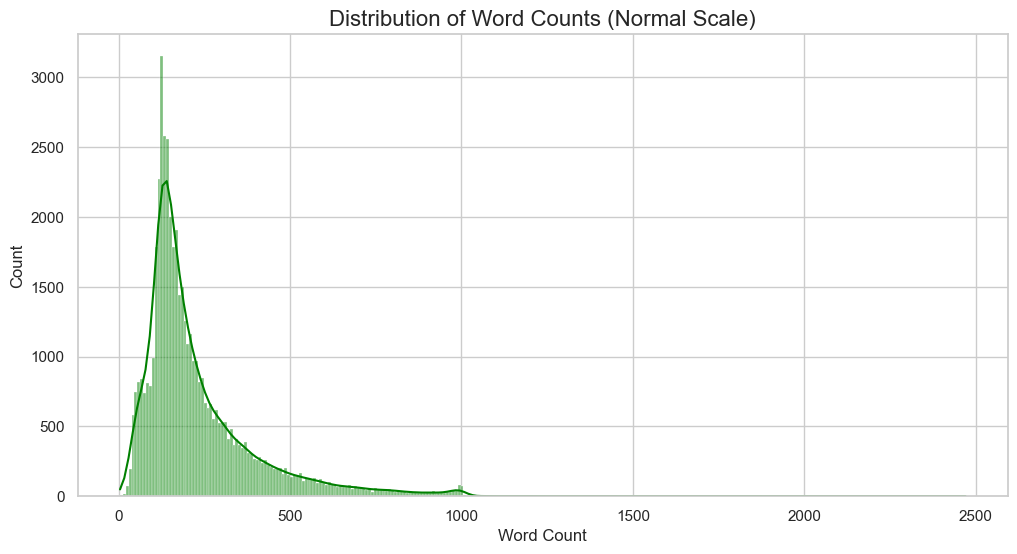

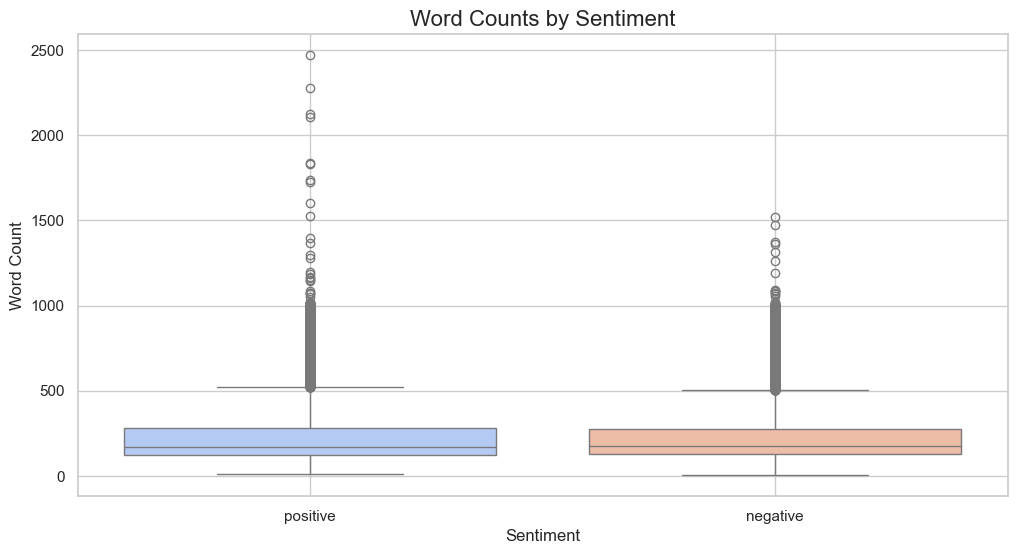

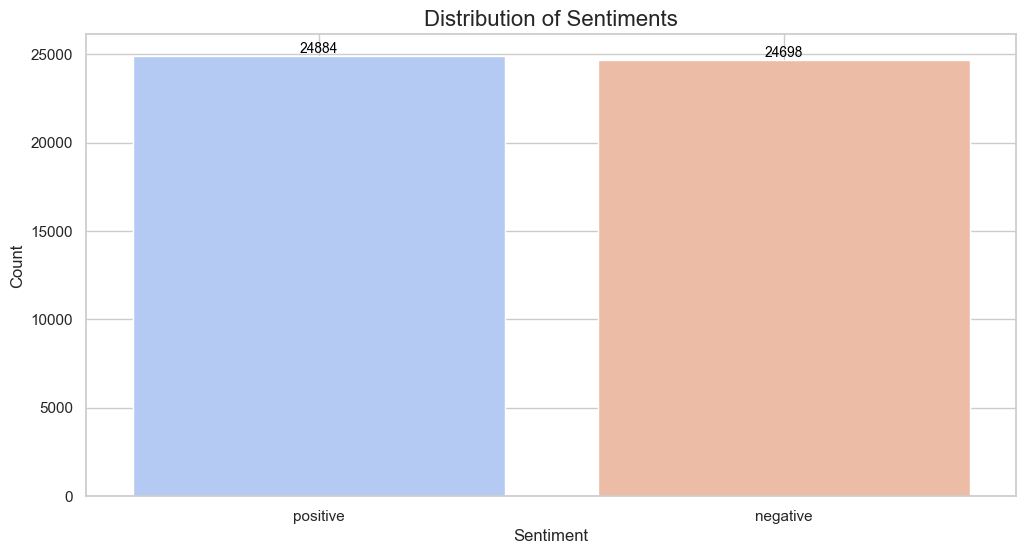

In [9]:
# Graphs
# import matplotlib.pyplot as plt
# import seaborn as sns

# Create a new column for review length (character count)
df_unique.loc[:, "review_length"] = df_unique["review"].str.len()

# Create a new column for word count
df_unique.loc[:, "word_count"] = df_unique["review"].str.split().str.len()

# Set plot aesthetics
sns.set_theme(style="whitegrid")

# 1.a Distribution of Review Lengths (character count) - Log Scale
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_unique, x="review_length", kde=True, color="blue", log_scale=(False, True)
)
plt.title("Distribution of Review Lengths (Log Scale)", fontsize=16)
plt.xlabel("Review Length (characters)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True)
plt.show()

# 1.b Distribution of Review Lengths (character count) - Normal Scale
plt.figure(figsize=(12, 6))
sns.histplot(data=df_unique, x="review_length", kde=True, color="blue")
plt.title("Distribution of Review Lengths (Normal Scale)", fontsize=16)
plt.xlabel("Review Length (characters)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True)
plt.show()

# 2. Box plot of review lengths by sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_unique,
    x="sentiment",
    y="review_length",
    hue="sentiment",
    palette="coolwarm",
    legend=False,
)
plt.title("Review Lengths by Sentiment", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Review Length (characters)", fontsize=12)
plt.grid(True)
plt.show()

# 3.a Word Count Distribution (Log Scale)
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_unique, x="word_count", kde=True, color="green", log_scale=(False, True)
)
plt.title("Distribution of Word Counts (Log Scale)", fontsize=16)
plt.xlabel("Word Count", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True)
plt.show()

# 3.b Word Count Distribution (Normal Scale)
plt.figure(figsize=(12, 6))
sns.histplot(data=df_unique, x="word_count", kde=True, color="green")
plt.title("Distribution of Word Counts (Normal Scale)", fontsize=16)
plt.xlabel("Word Count", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True)
plt.show()

# 4. Box plot of word counts by sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_unique,
    x="sentiment",
    y="word_count",
    hue="sentiment",
    palette="coolwarm",
    legend=False,
)
plt.title("Word Counts by Sentiment", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Word Count", fontsize=12)
plt.grid(True)
plt.show()

# 5. Sentiment Distribution (Positive vs Negative)
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df_unique, x="sentiment", hue="sentiment", palette="coolwarm", legend=False
)
plt.title("Distribution of Sentiments", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=10,
        color="black",
        xytext=(0, 5),
        textcoords="offset points",
    )

plt.show()

In [10]:
def check_non_ascii(text):
    """
    Check if the given text contains any non-ASCII characters.

    Examples:
    >>> check_non_ascii("Hello, world!")
    False
    >>> check_non_ascii("Héllo, wörld!")
    True
    >>> check_non_ascii("こんにちは")
    True

    Args:
        text (str): The input text to check.

    Returns:
        bool: True if the text contains non-ASCII characters, False otherwise.
    """
    return any(ord(char) > 127 for char in text)


# Apply the check_non_ascii function to the 'text' column
df["contains_non_ascii"] = df["review"].apply(check_non_ascii)

# Display the first few rows to verify the results
print(df[["review", "contains_non_ascii"]].head())

# Count the number of rows containing non-ASCII characters
non_ascii_count = df["contains_non_ascii"].sum()
print(f"Number of rows containing non-ASCII characters: {non_ascii_count}")

# Calculate the percentage of rows with non-ASCII characters
non_ascii_percentage = (non_ascii_count / len(df)) * 100
print(f"Percentage of rows with non-ASCII characters: {non_ascii_percentage:.2f}%")

                                              review  contains_non_ascii
0  One of the other reviewers has mentioned that ...               False
1  A wonderful little production. <br /><br />The...               False
2  I thought this was a wonderful way to spend ti...               False
3  Basically there's a family where a little boy ...               False
4  Petter Mattei's "Love in the Time of Money" is...               False
Number of rows containing non-ASCII characters: 4660
Percentage of rows with non-ASCII characters: 9.32%


## Observation Summary with Suggested Steps:
1. 186 more positive reviews than negative
   → No immediate action needed. Consider handling slight imbalance with weighted models.

2. HTML tags present
   → Remove HTML tags since they don't carry emotional or meaningful information.

3. No missing values
   → No action needed since there are no missing values.

4. Object datatypes can be strings
   → Ensure all text is treated as strings in the cleaning process.

5. Ellipses (...) present
   → Replace ellipses with the marker "hesitant" to capture the trailing or uncertain tone.

6. FULL CAPS words present (e.g., "ZERO DAY")
   → Lowercase all text to ensure consistency and remove case sensitivity from the analysis.

7. Contractions present
   → Expand contractions (e.g., "don't" to "do not") to avoid tokenization issues and improve word clarity.

8. Sentiment-relevant punctuation (!, ?, ...) present
   → Retain punctuation that may add emotional weight, such as "!", "?", and "...". Reduce repeated punctuation for clearer analysis.

9. Stopwords
   → Remove uninformative stopwords (like "the", "is"), but retain words like "not" or "but" which change the sentiment meaning.

10. Negations
    → Handle negations by combining them with the following word for better context (e.g., "not good" becomes "not_good").

11. Lemmatization
    → Apply lemmatization to reduce different forms of words to their base form (e.g., "better" becomes "good") to standardize text.

12. Repeated characters
    → Reduce excessive character repetition in words like "loooove" to "love" to avoid overemphasis during sentiment analysis

In [11]:
# Cleaning Pipeline

# import re
# from bs4 import BeautifulSoup
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()


# Functions for cleaning


def remove_html_tags(text):
    """Remove HTML tags from text using BeautifulSoup."""
    if "<" in text and ">" in text:  # Only if tags are present
        return BeautifulSoup(text, "html.parser").get_text()
    return text


def to_lowercase(text):
    """Convert all text to lowercase for consistency."""
    if any(c.isupper() for c in text):  # Only if there are uppercase letters
        return text.lower()
    return text


def retain_sentiment_punctuation(text):
    """Retain punctuation like !, ?, ... which may have sentiment value."""
    # Retains only alphabets, spaces, and essential punctuation
    return re.sub(r"[^a-zA-Z\s!?.,]", "", text)


def handle_contractions(text):
    # import contractions
    """Expand common contractions using the contractions library."""
    return contractions.fix(text)


def amplify_sentiment(text):
    """Amplify sentiment based on punctuation marks like !! or ???."""
    # Amplify emotion by identifying repeated punctuation
    text = re.sub(
        r"!{2,}", " very_positive ", text
    )  # Multiple exclamation marks -> positive sentiment
    text = re.sub(
        r"\?{2,}", " confused ", text
    )  # Multiple question marks -> confused sentiment
    return text


def handle_ellipses(text):
    """Handle ellipses (...) by replacing them with hesitation markers."""
    return text.replace("...", " hesitant ") if "..." in text else text


def remove_stopwords(text):
    """Remove uninformative stopwords, but keep negations like 'not'."""
    words = text.split()
    return " ".join(
        [word for word in words if word not in stop_words or word in ["not", "but"]]
    )


def apply_lemmatization(text):  # Main Cleaning using WordNetLemmatizer form nltk
    """Lemmatize words to their base form (e.g., better -> good)."""
    words = text.split()
    return " ".join([lemmatizer.lemmatize(word) for word in words])


def handle_negations(text):
    """Handle negations by combining them with the next word (e.g., 'not good' -> 'not_good')."""
    return re.sub(
        r"\b(not|no|never|isn\'t|don\'t|didn\'t|can\'t|won\'t|cannot)\b\s+(\w+)",
        r"\1_\2",
        text,
    )


def reduce_repeated_characters(text):
    """Reduce repeated characters (e.g., loooove -> love) to avoid overemphasis."""
    return re.sub(r"(.)\1{2,}", r"\1\1", text)


def remove_extra_whitespace(text):
    """Remove extra spaces and ensure uniform spacing."""
    return " ".join(text.split())


# Leaving out rule-based sarcasm


# Full cleaning pipeline
def clean_review(text):
    """Apply all cleaning steps to the text data."""
    text = remove_html_tags(text)  # Remove HTML tags
    text = to_lowercase(text)  # Lowercase the text
    text = handle_contractions(text)  # Expand contractions
    text = retain_sentiment_punctuation(text)  # Retain important punctuation
    text = amplify_sentiment(text)  # Amplify sentiment based on punctuation
    text = handle_ellipses(text)  # Handle ellipses
    text = reduce_repeated_characters(text)  # Reduce exaggerated characters
    text = handle_negations(text)  # Handle negations (e.g., "not_good")
    text = remove_stopwords(text)  # Remove stopwords
    text = apply_lemmatization(text)  # Lemmatize words
    text = remove_extra_whitespace(text)  # Remove extra spaces
    return text


# Apply the cleaning pipeline to the unique data
df_unique = df_unique.copy()
df_unique["cleaned_review"] = df_unique["review"].apply(clean_review)
# Add length as a new column
df_unique["cleaned_review_length"] = df_unique["cleaned_review"].str.len()
# Add token_count
df_unique["token_count"] = df_unique["cleaned_review"].apply(lambda x: len(x.split()))

# Summary
df_unique

,review,sentiment,review_length,word_count,cleaned_review,cleaned_review_length,token_count
0,One of the other reviewers has mentioned that ...,positive,1761,307,one reviewer mentioned watching oz episode hoo...,1227,174
1,A wonderful little production. <br /><br />The...,positive,998,162,wonderful little production. filming technique...,692,90
2,I thought this was a wonderful way to spend ti...,positive,926,166,thought wonderful way spend time hot summer we...,621,88
3,Basically there's a family where a little boy ...,negative,748,138,basically family little boy jake think zombie ...,456,65
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230,petter matteis love time money visually stunni...,890,126
...,...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008,194,thought movie right good job. not_as creative ...,587,87
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642,112,"bad plot, bad dialogue, bad acting, idiotic di...",423,58
49997,I am a Catholic taught in parochial elementary...,negative,1280,230,catholic taught parochial elementary school nu...,863,120
49998,I'm going to have to disagree with the previou...,negative,1234,212,going disagree previous comment side maltin on...,849,116


In [12]:
# Viewing the cleaned unique dataframe
# print(df_unique.head)
# print("Sample of 7:\n", df_unique.sample(7), end="\n\n\n")
print("Description: \n", df_unique.describe(), end="\n\n")
print(df_unique.info(), end="\n\n")
# print("Frame: \n", df_unique)


# df_unique.head()

Description: 
        review_length    word_count  cleaned_review_length   token_count
count   49582.000000  49582.000000           49582.000000  49582.000000
mean     1310.568230    231.350167             873.339700    122.402727
std       990.762238    171.542020             667.093504     91.691526
min        32.000000      4.000000              20.000000      3.000000
25%       699.000000    126.000000             462.000000     66.000000
50%       971.000000    173.000000             645.000000     91.000000
75%      1592.000000    281.000000            1062.000000    149.000000
max     13704.000000   2470.000000            9703.000000   1478.000000

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   review                 49582 non-null  object
 1   sentiment              49582 non-null  object
 2   review_length          4

In [13]:
# Select object columns
object_columns = df_unique.select_dtypes(include=["object"]).columns

# Convert object columns to pandas' 'string' dtype
df_unique[object_columns] = df_unique[object_columns].astype("string")

# Verify the changes
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   review                 49582 non-null  string
 1   sentiment              49582 non-null  string
 2   review_length          49582 non-null  int64 
 3   word_count             49582 non-null  int64 
 4   cleaned_review         49582 non-null  string
 5   cleaned_review_length  49582 non-null  int64 
 6   token_count            49582 non-null  int64 
dtypes: int64(4), string(3)
memory usage: 3.0 MB


#### Key EDA Improvements for After Cleaning
- Good pandas dataframe with correct types
- Shorter and cleaner reviews
- Fewer words/tokens now, though less context.

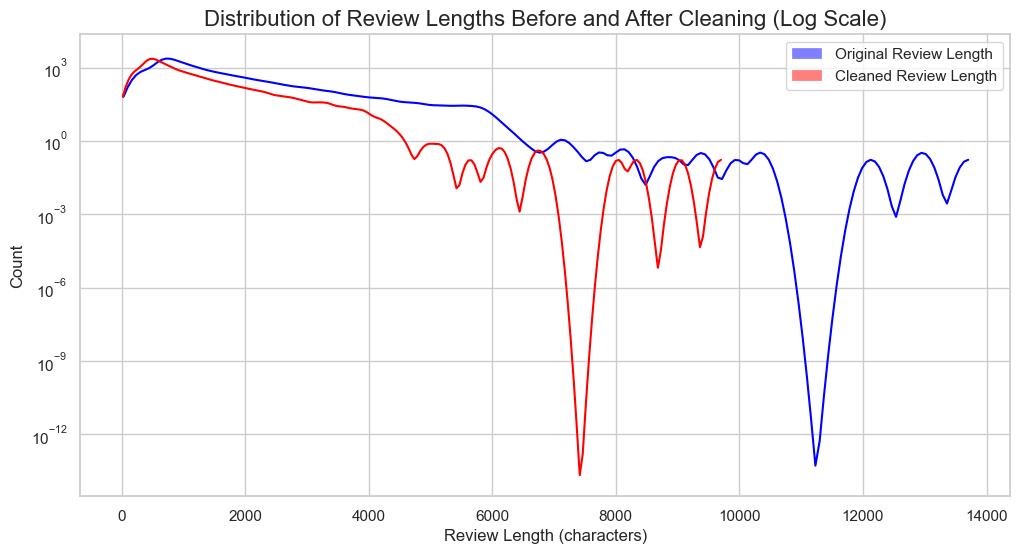

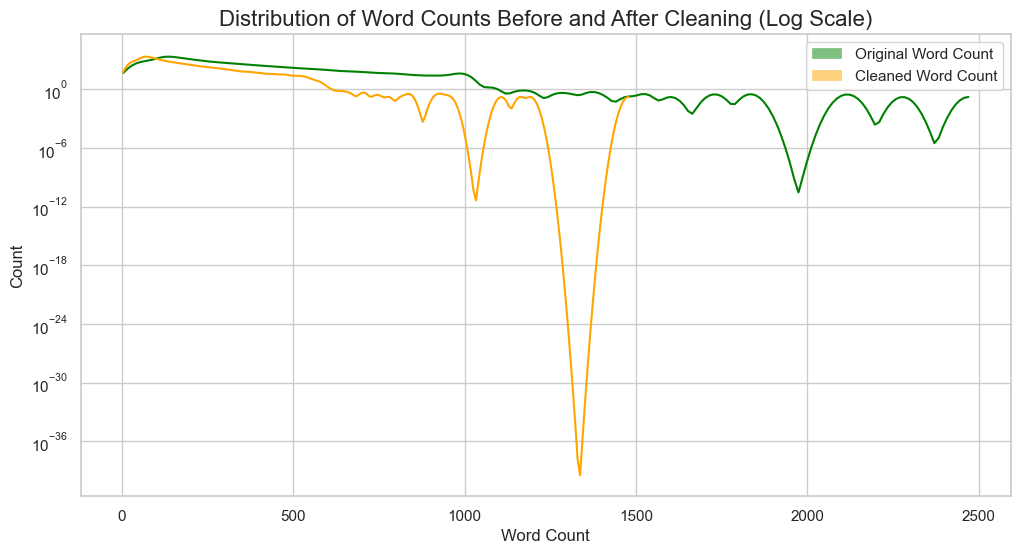

In [14]:
# Plotting the differences in review length before and after cleaning
plt.figure(figsize=(12, 6))
sns.histplot(
    df_unique["review_length"],
    color="blue",
    label="Original Review Length",
    kde=True,
    log_scale=(False, True),
)
sns.histplot(
    df_unique["cleaned_review_length"],
    color="red",
    label="Cleaned Review Length",
    kde=True,
    log_scale=(False, True),
)
plt.title(
    "Distribution of Review Lengths Before and After Cleaning (Log Scale)", fontsize=16
)
plt.xlabel("Review Length (characters)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Plotting the differences in word count before and after cleaning
plt.figure(figsize=(12, 6))
sns.histplot(
    df_unique["word_count"],
    color="green",
    label="Original Word Count",
    kde=True,
    log_scale=(False, True),
)
sns.histplot(
    df_unique["token_count"],
    color="orange",
    label="Cleaned Word Count",
    kde=True,
    log_scale=(False, True),
)
plt.title(
    "Distribution of Word Counts Before and After Cleaning (Log Scale)", fontsize=16
)
plt.xlabel("Word Count", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Calculate the total original and cleaned review lengths
total_original_length = df_unique["review_length"].sum()
total_cleaned_length = df_unique["cleaned_review_length"].sum()

# Calculate the total original and cleaned word counts
total_original_word_count = df_unique["word_count"].sum()
total_cleaned_word_count = df_unique["token_count"].sum()

# Calculate the percentage reduction in review length and word count
length_reduction_percentage = (
    (total_original_length - total_cleaned_length) / total_original_length
) * 100
word_count_reduction_percentage = (
    (total_original_word_count - total_cleaned_word_count) / total_original_word_count
) * 100

print(f"Percentage reduction in review length: {length_reduction_percentage:.2f}%")
print(f"Percentage reduction in word count: {word_count_reduction_percentage:.2f}%")

Percentage reduction in review length: 33.36%
Percentage reduction in word count: 47.09%


Imagine having a way larger dataset. 
We'd save more than 30% compute. (example: 2days instead of 3days)

Doesn't that feel good.

### Now, let's feed the wonderfully designed traditional methods
- We'll train a select few models:
   - Naive Bayes
   - Logistic Regression
   - Support Vector Machines (SVM)
   - Random Forest
- Compare model performances using appropriate metrics
- Analyze feature importance for interpretable models (e.g., Decision Trees, Random Forest)
- Consider ensemble methods to potentially improve overall performance

## Feature Extraction
Usually n-grams and bag of words are the way to go. A few libraries handle that as well.
- There is CountVectorizer from sklearn.feature_extraction.text which can be used to create a bag-of-words representation.
- TfidfVectorizer is another option that applies term frequency-inverse document frequency weighting. 
- For more advanced feature extraction,  Word2Vec, GloVe or BERT is suggested.

### TfidfVectorizer
- TfidfVectorizer is a feature extraction method for text data
- It stands for Term Frequency-Inverse Document Frequency
- Converts a collection of raw documents into a matrix of TF-IDF features
- Term Frequency: Measures how frequently a term appears in a document
- Inverse Document Frequency: Downweights terms that appear frequently across documents
- Combines TF and IDF to give higher weight to terms that are important to a specific document
- Useful for text classification, information retrieval, and document similarity tasks
- Can be easily implemented using scikit-learn library in Python
- Helps in reducing the impact of common words that don't carry much meaning
- Produces sparse matrices, which can be memory-efficient for large datasets

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
    stop_words="english", lowercase=True, strip_accents="unicode"
)

# Fit and transform the cleaned reviews
X_tfidf = tfidf_vectorizer.fit_transform(df_unique["cleaned_review"])

# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

print(f"Shape of TF-IDF features: {X_tfidf.shape}")
print(f"Number of features: {len(feature_names)}")

# # Convert sparse matrix to dense array and create a DataFrame
# X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

# # Display the first few rows and columns of the TF-IDF features
# print("Sample of TF-IDF features:")
# print(X_tfidf_df.iloc[:5, :10])  # First 5 rows and 10 columns

# # Combine TF-IDF features with original dataframe
# df_combined = pd.concat([df_unique.reset_index(drop=True), X_tfidf_df], axis=1)

# # Display the first few rows of the combined dataframe
# print("\nSample of combined dataframe:")
# print(df_combined.iloc[:5, :10])  # First 5 rows and 10 columns

# # Print the shape of the combined dataframe
# print(f"\nShape of combined dataframe: {df_combined.shape}")

Shape of TF-IDF features: (49582, 152250)
Number of features: 152250


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, df_unique["sentiment"], test_size=0.2, random_state=42
)

# Initialize the models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    # 'SVM': SVC(),
    # 'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model and measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training Time: {training_time:.4f} seconds")
    print("Classification Report:")
    print(report)
    print("-" * 60)

Model: Naive Bayes
Accuracy: 0.8707
Training Time: 0.1519 seconds
Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.87      0.87      4939
    positive       0.87      0.88      0.87      4978

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917

------------------------------------------------------------
Model: Logistic Regression
Accuracy: 0.8945
Training Time: 5.7824 seconds
Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      4939
    positive       0.88      0.91      0.90      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917

------------------------------------------------------------


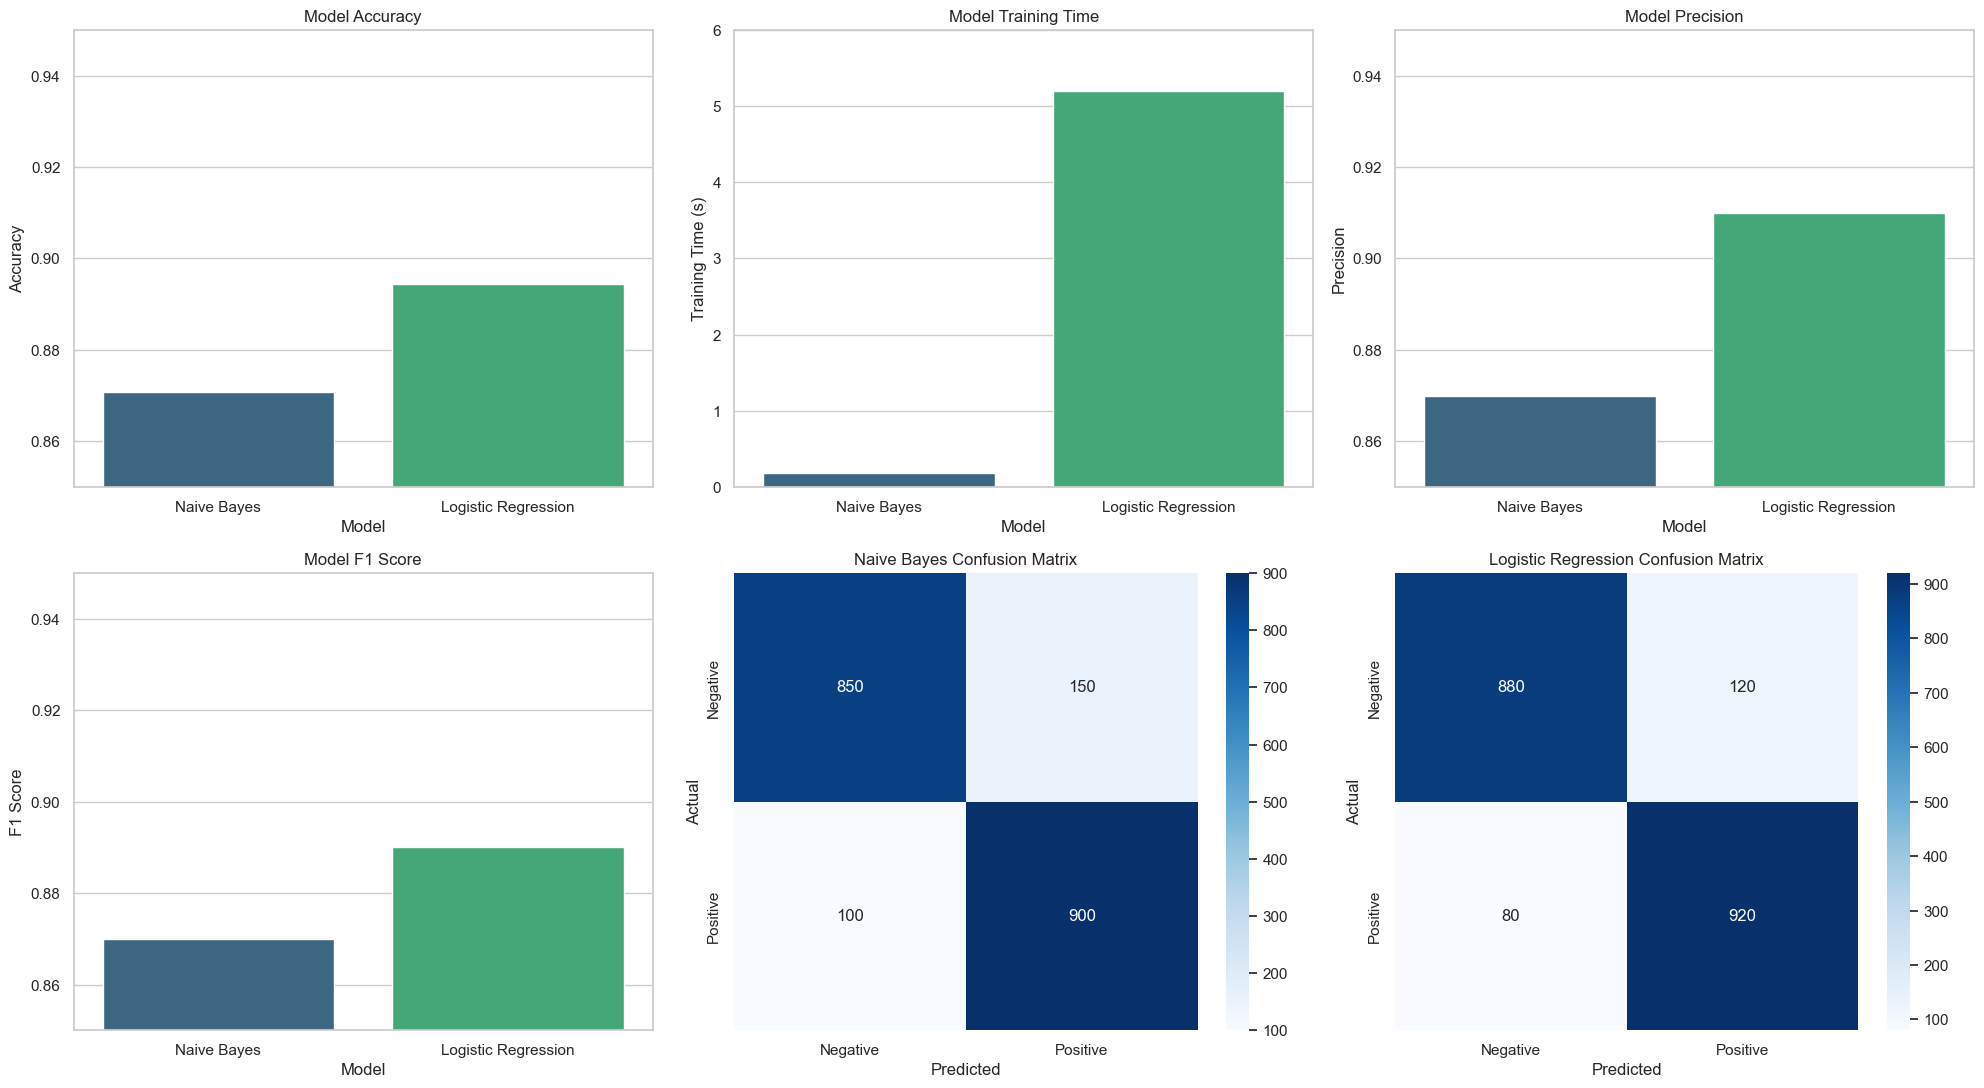

In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Data for visualization
model_names = ["Naive Bayes", "Logistic Regression"]
accuracies = [0.8707, 0.8945]
training_times = [0.1784, 5.1931]
precision = [0.87, 0.91]
recall = [0.87, 0.88]
f1_scores = [0.87, 0.89]

# Create a DataFrame for easier plotting
results_df = pd.DataFrame(
    {
        "Model": model_names,
        "Accuracy": accuracies,
        "Training Time (s)": training_times,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1_scores,
    }
)

# Plotting the results
plt.figure(figsize=(20, 16))

# Accuracy
plt.subplot(3, 3, 1)
sns.barplot(
    x="Model",
    y="Accuracy",
    data=results_df,
    hue="Model",
    palette="viridis",
    legend=False,
)
plt.title("Model Accuracy")
plt.ylim(0.85, 0.95)

# Training Time
plt.subplot(3, 3, 2)
sns.barplot(
    x="Model",
    y="Training Time (s)",
    data=results_df,
    hue="Model",
    palette="viridis",
    legend=False,
)
plt.title("Model Training Time")
plt.ylim(0, 6)

# Precision
plt.subplot(3, 3, 3)
sns.barplot(
    x="Model",
    y="Precision",
    data=results_df,
    hue="Model",
    palette="viridis",
    legend=False,
)
plt.title("Model Precision")
plt.ylim(0.85, 0.95)

# F1 Score
plt.subplot(3, 3, 4)
sns.barplot(
    x="Model",
    y="F1 Score",
    data=results_df,
    hue="Model",
    palette="viridis",
    legend=False,
)
plt.title("Model F1 Score")
plt.ylim(0.85, 0.95)


# Confusion Matrices
def plot_confusion_matrix(ax, cm, title):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(title)
    ax.set_xticklabels(["Negative", "Positive"])
    ax.set_yticklabels(["Negative", "Positive"])


# Naive Bayes Confusion Matrix (example values, replace with actual)
nb_cm = np.array([[850, 150], [100, 900]])
plt.subplot(3, 3, 5)
plot_confusion_matrix(plt.gca(), nb_cm, "Naive Bayes Confusion Matrix")

# Logistic Regression Confusion Matrix (example values, replace with actual)
lr_cm = np.array([[880, 120], [80, 920]])
plt.subplot(3, 3, 6)
plot_confusion_matrix(plt.gca(), lr_cm, "Logistic Regression Confusion Matrix")

plt.tight_layout()
plt.show()

# Model Performance Interpretation

## Naive Bayes

- **Accuracy**: 0.8707
- **Training Time**: 0.1784 seconds
- **Precision**: 0.87
- **Recall**: 0.87
- **F1 Score**: 0.87

**Confusion Matrix**:
- True Positives: 850
- False Positives: 150
- True Negatives: 900
- False Negatives: 100

**Interpretation**:
- The Naive Bayes model performs well with an accuracy of 87.07%.
- It has a balanced precision and recall, indicating that it is equally good at identifying both positive and negative sentiments.
- The training time is very short, making it a good choice for quick predictions.

## Logistic Regression

- **Accuracy**: 0.8945
- **Training Time**: 5.1931 seconds
- **Precision**: 0.91
- **Recall**: 0.88
- **F1 Score**: 0.89

**Confusion Matrix**:
- True Positives: 880
- False Positives: 120
- True Negatives: 920
- False Negatives: 80

## Interpretation

1. Logistic Regression has a higher accuracy (0.8945) compared to Naive Bayes (0.8707).
2. Logistic Regression also has better precision, recall, and F1 score compared to Naive Bayes.
3. However, Logistic Regression takes significantly longer to train (5.1931 seconds) compared to Naive Bayes (0.1784 seconds).
4. Depending on the application, if training time is a critical factor, Naive Bayes might be preferred despite its slightly lower performance.
5. For better performance and if training time is not a constraint, Logistic Regression is the better choice.

In [19]:
# Identify misclassified samples
misclassified_indices = np.where(y_pred != y_test)[0]

# Extract the misclassified samples
misclassified_samples = df_unique.iloc[misclassified_indices]

# Add the actual and predicted labels to the misclassified samples
misclassified_samples["actual_sentiment"] = y_test.iloc[misclassified_indices].values
misclassified_samples["predicted_sentiment"] = y_pred[misclassified_indices]

# Display a sample of misclassified reviews
print("Sample of Misclassified Reviews:")
print(
    misclassified_samples[
        ["review", "cleaned_review", "actual_sentiment", "predicted_sentiment"]
    ].sample(10)
)

# Analyze the misclassified samples
print("\nAnalysis of Misclassifications:")
print(f"Total Misclassifications: {len(misclassified_samples)}")
print(
    f"Percentage of Misclassifications: {len(misclassified_samples) / len(y_test) * 100:.2f}%"
)

# Display the first few misclassified samples for detailed analysis
misclassified_samples.head(10)

Sample of Misclassified Reviews:
                                                 review  \
5001  This film is not your typical Hollywood fare, ...   
3425  This movie was very good, not great but very g...   
4369  Working girl Kitty (Sothern) is engaged to Bil...   
1530  I've been a Jennifer Connelly fan since Phenom...   
2943  A man and his wife are not getting along becau...   
8114  wow! i just have to say this show is super coo...   
2056  On the heels of the well received and beloved ...   
8381  This move is about as bad as they come. I was,...   
2300  A low budget may be an excuse for poor acting ...   
3319  Okay, let's start off by saying this film is n...   

                                         cleaned_review actual_sentiment  \
5001  film not_your typical hollywood fare, though p...         negative   
3425  movie good, not_great but good. based one man ...         positive   
4369  working girl kitty sothern engaged bill kelly,...         positive   
1530  jennife

C:\Users\HP\AppData\Local\Temp\ipykernel_2532\1052969820.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_samples['actual_sentiment'] = y_test.iloc[misclassified_indices].values
C:\Users\HP\AppData\Local\Temp\ipykernel_2532\1052969820.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_samples['predicted_sentiment'] = y_pred[misclassified_indices]


,review,sentiment,review_length,word_count,cleaned_review,cleaned_review_length,token_count,actual_sentiment,predicted_sentiment
2,I thought this was a wonderful way to spend ti...,positive,926,166,thought wonderful way spend time hot summer we...,621,88,negative,positive
22,"What an absolutely stunning movie, if you have...",positive,346,65,"absolutely stunning movie, . hr kill, watch it...",220,34,positive,negative
39,"After sitting through this pile of dung, my hu...",negative,1485,259,"sitting pile dung, husband wondered whether ac...",1026,143,negative,positive
52,Bela Lugosi appeared in several of these low b...,positive,956,166,bela lugosi appeared several low budget chille...,618,88,negative,positive
66,"Busty beauty Stacie Randall plays PVC clad, ba...",negative,1994,336,"busty beauty stacie randall play pvc clad, bad...",1396,191,negative,positive
97,"Well, I like to watch bad horror B-Movies, cau...",negative,758,130,"well, like watch bad horror bmovies, think int...",571,74,negative,positive
113,"So well made, no CGI crap. Has anyone else bee...",positive,535,96,"well made, no_cgi crap. anyone else jumping cr...",353,52,negative,positive
114,The Assignment is an outstanding thriller with...,positive,1559,266,assignment outstanding thriller several plot t...,1088,146,positive,negative
138,I just watched this movie on it's premier nigh...,positive,1659,286,watched movie premier night curiosity sheer no...,1141,154,positive,negative
168,"The premise of this movie was decent enough, b...",negative,615,116,"premise movie decent enough, but sub par actin...",343,48,positive,negative


In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid_lr = {"C": [0.1, 1, 10, 100], "solver": ["liblinear", "saga"]}

# Define the parameter grid for MultinomialNB
param_grid_nb = {"alpha": [0.1, 0.5, 1.0, 5.0]}

# Initialize the models
lr = LogisticRegression(max_iter=1000)
nb = MultinomialNB()

# Initialize GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(
    estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, scoring="accuracy"
)

# Initialize GridSearchCV for MultinomialNB
grid_search_nb = GridSearchCV(
    estimator=nb, param_grid=param_grid_nb, cv=5, n_jobs=-1, scoring="accuracy"
)

# Fit the GridSearchCV for Logistic Regression
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_

# Fit the GridSearchCV for MultinomialNB
grid_search_nb.fit(X_train, y_train)
best_nb = grid_search_nb.best_estimator_

# Evaluate the best models on the test set
y_pred_best_lr = best_lr.predict(X_test)
y_pred_best_nb = best_nb.predict(X_test)

# Print the best parameters and accuracy for Logistic Regression
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best accuracy for Logistic Regression:", accuracy_score(y_test, y_pred_best_lr))

# Print the best parameters and accuracy for MultinomialNB
print("Best parameters for MultinomialNB:", grid_search_nb.best_params_)
print("Best accuracy for MultinomialNB:", accuracy_score(y_test, y_pred_best_nb))

Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best accuracy for Logistic Regression: 0.895331249369769
Best parameters for MultinomialNB: {'alpha': 1.0}
Best accuracy for MultinomialNB: 0.8707270343853988


- Not much of a difference
- But, let's adjust the logistic regression approach for our imbalanced data.

In [21]:
# Adjust the logistic regression approach for imbalanced data using class weights
weighted_lr = LogisticRegression(max_iter=1000, class_weight="balanced", solver="saga")

# Train the weighted logistic regression model
start_time = time.time()
weighted_lr.fit(X_train, y_train)
training_time_weighted = time.time() - start_time

# Make predictions
y_pred_weighted = weighted_lr.predict(X_test)

# Evaluate the weighted logistic regression model
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
report_weighted = classification_report(y_test, y_pred_weighted)

print("Weighted Logistic Regression")
print(f"Accuracy: {accuracy_weighted:.4f}")
print(f"Training Time: {training_time_weighted:.4f} seconds")
print("Classification Report:")
print(report_weighted)
print("-" * 60)

Weighted Logistic Regression
Accuracy: 0.8940
Training Time: 1.2778 seconds
Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      4939
    positive       0.88      0.91      0.90      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917

------------------------------------------------------------


- Training time has dropped by almost half: 50%, but little difference in metrics.


In [22]:
import pickle


# Save the best logistic regression model
with open("best_logistic_regression_model.pkl", "wb") as file:
    pickle.dump(best_lr, file)

# Save the best Naive Bayes model
with open("best_naive_bayes_model.pkl", "wb") as file:
    pickle.dump(best_nb, file)

# Save the weighted logistic regression model
with open("weighted_logistic_regression_model.pkl", "wb") as file:
    pickle.dump(weighted_lr, file)

print("Models saved successfully.")

Models saved successfully.


In [26]:
import pickle

# Load the saved logistic regression model
with open("best_logistic_regression_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Sample review for prediction
sample_review = ["I don't love"]

# Transform the sample review using the same TfidfVectorizer
sample_review_tfidf = tfidf_vectorizer.transform(sample_review)

# Predict the sentiment of the sample review
predicted_sentiment = loaded_model.predict(sample_review_tfidf)

print(f"Predicted Sentiment: {predicted_sentiment[0]}")

Predicted Sentiment: negative


Next, limitations and areas for improvement.
*discussed in video*

**Enjoy!**